In [1]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

conn = sqlite3.connect("./data/output/home_ahead.db")
cur = conn.cursor()

In [2]:
sns.set(style="ticks", palette="pastel")

In [3]:
ahead_df = pd.read_sql_query("select * from processed_data;", conn)

In [4]:
ahead_df.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_3_avg_margin,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-5.953488,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,3.903226,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,7.628571,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN
3,20000432,155,155,1.000000,32.0,39.0,35.0,49.0,NaN,NaN,...,16.685714,9.979592,NaN,NaN,NaN,15.077419,1,NaN,NaN,NaN
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-8.218750,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN


In [5]:
len(ahead_df)

20505

In [6]:
ahead_df['GAME_ID'].unique()

array([20001149, 20000923, 20000936, ..., 21700283, 21700079, 21701058])

In [7]:
def year_parse(row):
    '''returns year for the start of the season based on the game id,
       since we know these are all year 2000 and beyond we hardcode the prefix
    '''
    game_id = row['GAME_ID']
    year = "20{}".format(str(game_id)[1:3])
    return year

In [8]:
ahead_df['year'] = ahead_df.apply(lambda x: year_parse(x), axis=1)

In [9]:
ahead_df.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin,year
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN,2000
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN,2000
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN,2000
3,20000432,155,155,1.000000,32.0,39.0,35.0,49.0,NaN,NaN,...,9.979592,NaN,NaN,NaN,15.077419,1,NaN,NaN,NaN,2000
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN,2000


Lets first just make sure we know the difference between games that ended in 4 periods and those that went into overtime.

In [10]:
ot_games = ahead_df.dropna(subset=['period_5_events'])

In [11]:
len(ot_games)

1283

A small fraction ((1283/20505)*100) = 6.26% of games went into overtime, let's ignore these

In [12]:
ot_games.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin,year
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN,2000
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN,2000
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN,2000
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN,2000
5,20000847,150,68,0.453333,32.0,30.0,29.0,23.0,17.0,19.0,...,4.043478,-1.882353,0.421053,NaN,0.406667,1,NaN,NaN,NaN,2000


In [13]:
no_ot_df = ahead_df[ahead_df['period_5_events'].isna()]

In [14]:
len(no_ot_df)

19222

In [15]:
len(no_ot_df[(no_ot_df.period_4_ahead < 4) & (no_ot_df.home_win == 1)].home_win)

84

In [16]:
len(no_ot_df[(no_ot_df.period_4_ahead < 10) & (no_ot_df.home_win == 1)].home_win)

429

In [17]:
no_ot_df.describe()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_3_avg_margin,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin
count,1.922200e+04,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,0.0,0.0,...,19222.000000,19222.000000,0.0,0.0,0.0,19222.000000,19222.000000,0.0,0.0,0.0
mean,2.080965e+07,116.864322,64.354073,0.550088,27.810374,29.637343,29.257465,30.159141,NaN,NaN,...,2.370167,3.079925,NaN,NaN,NaN,1.920179,0.601706,NaN,NaN,NaN
std,5.005453e+05,11.850622,41.281502,0.346082,4.729705,5.057316,5.024050,5.807475,NaN,NaN,...,11.199480,12.829109,NaN,NaN,NaN,8.439207,0.489559,NaN,NaN,NaN
min,2.000000e+07,77.000000,0.000000,0.000000,11.000000,11.000000,12.000000,13.000000,NaN,NaN,...,-41.593750,-51.230769,NaN,NaN,NaN,-34.882353,0.000000,NaN,NaN,NaN
25%,2.040040e+07,109.000000,25.000000,0.219298,25.000000,26.000000,26.000000,26.000000,NaN,NaN,...,-5.000000,-5.551724,NaN,NaN,NaN,-3.735281,0.000000,NaN,NaN,NaN
50%,2.080060e+07,116.000000,69.000000,0.596837,28.000000,29.000000,29.000000,30.000000,NaN,NaN,...,2.365152,3.382738,NaN,NaN,NaN,2.020287,1.000000,NaN,NaN,NaN
75%,2.120104e+07,124.000000,101.000000,0.887188,31.000000,33.000000,32.000000,34.000000,NaN,NaN,...,9.817340,11.554598,NaN,NaN,NaN,7.565804,1.000000,NaN,NaN,NaN
max,2.170123e+07,173.000000,171.000000,1.000000,48.000000,51.000000,52.000000,61.000000,NaN,NaN,...,47.086957,59.636364,NaN,NaN,NaN,37.025000,1.000000,NaN,NaN,NaN


Lets have a look at distribution of number of events where home team was ahead in the fourth period (binned in 10s) by whether they won or lost

In [18]:
p4_win_bins = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_4_ahead'], [0, 10, 20, 30, 40, 50, 60, 70])

In [19]:
p4_loss_bins = pd.cut(no_ot_df[no_ot_df.home_win==0]['period_4_ahead'], [0, 10, 20, 30, 40, 50, 60, 70])

In [20]:
no_ot_df[no_ot_df.home_win==1].groupby(p4_win_bins)['period_4_ahead'].agg(['count'])

,count
period_4_ahead,
"(0, 10]",505
"(10, 20]",1405
"(20, 30]",5727
"(30, 40]",3580
"(40, 50]",333
"(50, 60]",15
"(60, 70]",1


In [21]:
no_ot_df[no_ot_df.home_win==0].groupby(p4_loss_bins)['period_4_ahead'].agg(['count'])

,count
period_4_ahead,
"(0, 10]",1633
"(10, 20]",658
"(20, 30]",274
"(30, 40]",20
"(40, 50]",1
"(50, 60]",0
"(60, 70]",0


In [22]:
from pandas.plotting import scatter_matrix

In [23]:
no_ot_clipped = no_ot_df[['GAME_ID', 'total_events', 'year', 'home_ahead', 'pct_home_ahead', 'period_1_events', 'period_2_events', 'period_3_events', 'period_4_events', 'period_1_ahead', 'period_2_ahead', 'period_3_ahead', 'period_4_ahead', 'total_avg_margin', 'period_1_avg_margin', 'period_2_avg_margin', 'period_3_avg_margin', 'period_4_avg_margin', 'home_win']]

In [24]:
no_ot_clipped.head()

,GAME_ID,total_events,year,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_1_ahead,period_2_ahead,period_3_ahead,period_4_ahead,total_avg_margin,period_1_avg_margin,period_2_avg_margin,period_3_avg_margin,period_4_avg_margin,home_win
3,20000432,155,2000,155,1.000000,32.0,39.0,35.0,49.0,32.0,39.0,35.0,49.0,15.077419,12.281250,22.333333,16.685714,9.979592,1
7,20000290,149,2000,64,0.429530,39.0,40.0,31.0,39.0,15.0,2.0,18.0,29.0,-0.268456,0.128205,-5.925000,1.064516,4.076923,1
9,20001172,149,2000,63,0.422819,37.0,33.0,34.0,45.0,29.0,7.0,0.0,27.0,-3.093960,2.729730,-2.242424,-11.647059,-2.044444,1
15,20000907,146,2000,144,0.986301,39.0,34.0,38.0,35.0,37.0,34.0,38.0,35.0,7.493151,4.051282,7.588235,5.552632,13.342857,1
17,20001140,144,2000,100,0.694444,36.0,35.0,31.0,42.0,23.0,22.0,18.0,37.0,1.972222,1.166667,1.257143,0.580645,4.285714,1


And let's apply a scatter matrix to see if there are any meaningful correlations

In [25]:
# axs = scatter_matrix(no_ot_clipped, alpha=0.2, diagonal='kde', figsize=(24,24))

This doesn't really tell us much, which means we probably would need to manipulate our data a little more

Let's head back to the top and see about percentage of game spent ahead and whether home team won or not

In [26]:
total_ahead_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['pct_home_ahead'], [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1])

In [27]:
total_ahead_bins_loss = pd.cut(no_ot_df[no_ot_df.home_win==0]['pct_home_ahead'], [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1])

In [28]:
no_ot_df[no_ot_df.home_win==1].groupby(total_ahead_bins_win)['pct_home_ahead'].agg(['count'])

,count
pct_home_ahead,
"(0.0, 0.1]",124
"(0.1, 0.2]",288
"(0.2, 0.3]",417
"(0.3, 0.4]",540
"(0.4, 0.5]",717
"(0.5, 0.6]",809
"(0.6, 0.7]",1043
"(0.7, 0.8]",1363
"(0.8, 0.9]",1825


In [29]:
no_ot_df[no_ot_df.home_win==0].groupby(total_ahead_bins_loss)['pct_home_ahead'].agg(['count'])

,count
pct_home_ahead,
"(0.0, 0.1]",2194
"(0.1, 0.2]",1141
"(0.2, 0.3]",901
"(0.3, 0.4]",694
"(0.4, 0.5]",577
"(0.5, 0.6]",454
"(0.6, 0.7]",338
"(0.7, 0.8]",309
"(0.8, 0.9]",207


So we have a sensefor the distribution of how being ahead or not, for what percentage of a game, will impact a win or a loss.

But what do we call a comeback. We'll want to have a standard measure of what is considered a comeback. That is, if a team is trailing by 1-3 points for the entirety of the game and either win or lose, that's probably not a comeback. We'll want a threshold by which a team overcame a considerable, negative score margin, sustained over a majority of a period or periods, to win the game.

For this we might need some other things, such as the average score margin over all as well as per period.

In [30]:
margin_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['total_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==1].groupby(margin_bins_win)['total_avg_margin'].agg(['count'])

,count
total_avg_margin,
"(0, 2]",1124
"(2, 4]",1397
"(4, 6]",1551
"(6, 8]",1393
"(8, 10]",1243
"(10, 12]",1052
"(12, 14]",751
"(14, 16]",535
"(16, 18]",351


In [31]:
margin_bins_loss = pd.cut(no_ot_df[no_ot_df.home_win==0]['total_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==0].groupby(margin_bins_loss)['total_avg_margin'].agg(['count'])

,count
total_avg_margin,
"(0, 2]",668
"(2, 4]",421
"(4, 6]",252
"(6, 8]",92
"(8, 10]",32
"(10, 12]",15
"(12, 14]",4
"(14, 16]",0
"(16, 18]",2


In [32]:
first_margin_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_1_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==1].groupby(first_margin_bins_win)['period_1_avg_margin'].agg(['count'])

,count
period_1_avg_margin,
"(0, 2]",2005
"(2, 4]",2018
"(4, 6]",1585
"(6, 8]",1075
"(8, 10]",547
"(10, 12]",279
"(12, 14]",98
"(14, 16]",23
"(16, 18]",6


In [33]:
second_margin_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_2_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==1].groupby(second_margin_bins_win)['period_2_avg_margin'].agg(['count'])

,count
period_2_avg_margin,
"(0, 2]",1061
"(2, 4]",1170
"(4, 6]",1221
"(6, 8]",1163
"(8, 10]",1065
"(10, 12]",895
"(12, 14]",648
"(14, 16]",469
"(16, 18]",332


In [34]:
third_margin_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_3_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==1].groupby(third_margin_bins_win)['period_3_avg_margin'].agg(['count'])

,count
period_3_avg_margin,
"(0, 2]",865
"(2, 4]",934
"(4, 6]",1063
"(6, 8]",1091
"(8, 10]",1018
"(10, 12]",934
"(12, 14]",836
"(14, 16]",665
"(16, 18]",598


In [35]:
fourth_margin_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_4_avg_margin'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
no_ot_df[no_ot_df.home_win==1].groupby(fourth_margin_bins_win)['period_4_avg_margin'].agg(['count'])

,count
period_4_avg_margin,
"(0, 2]",738
"(2, 4]",1018
"(4, 6]",1183
"(6, 8]",1172
"(8, 10]",1133
"(10, 12]",1023
"(12, 14]",902
"(14, 16]",745
"(16, 18]",646


### Probability of home team win/loss

In [58]:
TOTAL_RECORDS = len(no_ot_df)
TOTAL_RECORDS

19222

In [59]:
win_prob = no_ot_df.groupby('home_win').size().div(TOTAL_RECORDS)

In [60]:
def down_by_five(row, col):
    dbf = 0
    if row[col] <= -5:
        dbf = 1
    return dbf

In [61]:
no_ot_df['dbf_1_period'] = no_ot_df.apply(lambda x: down_by_five(x, 'period_1_avg_margin'), axis=1)
no_ot_df['dbf_2_period'] = no_ot_df.apply(lambda x: down_by_five(x, 'period_2_avg_margin'), axis=1)
no_ot_df['dbf_3_period'] = no_ot_df.apply(lambda x: down_by_five(x, 'period_3_avg_margin'), axis=1)
no_ot_df['dbf_4_period'] = no_ot_df.apply(lambda x: down_by_five(x, 'period_4_avg_margin'), axis=1)

/usr/local/Cellar/ipython/6.4.0_1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/6.4.0_1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/6.4.0_1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [62]:
no_ot_df.groupby(['home_win', 'dbf_1_period']).size().div(TOTAL_RECORDS).div(win_prob, axis=0, level='dbf_1_period')

home_win  dbf_1_period
0         0               0.794410
          1               0.136089
1         0               1.421630
          1               0.058966
dtype: float64

In [64]:
no_ot_df.groupby(['home_win', 'dbf_2_period']).size().div(TOTAL_RECORDS).div(win_prob, axis=0, level='dbf_2_period')

home_win  dbf_2_period
0         0               0.576672
          1               0.280218
1         0               1.372910
          1               0.091216
dtype: float64

In [65]:
no_ot_df.groupby(['home_win', 'dbf_3_period']).size().div(TOTAL_RECORDS).div(win_prob, axis=0, level='dbf_3_period')

home_win  dbf_3_period
0         0               0.458986
          1               0.358119
1         0               1.423459
          1               0.057755
dtype: float64

In [66]:
no_ot_df.groupby(['home_win', 'dbf_3_period']).size().div(TOTAL_RECORDS).div(win_prob, axis=0, level='dbf_3_period')

home_win  dbf_3_period
0         0               0.458986
          1               0.358119
1         0               1.423459
          1               0.057755
dtype: float64

### Looking at averages by year of margins overall and by period for winning team and losing team

In [67]:
no_ot_df[no_ot_df.home_win==0].groupby(['year']).agg({"total_avg_margin":"mean"})

,total_avg_margin
year,
2000,-5.069201
2001,-4.782259
2002,-4.615914
2003,-4.728227
2004,-4.791647
2005,-4.689422
2006,-4.621498
2007,-4.946647
2008,-5.117901


In [68]:
no_ot_df[no_ot_df.home_win==1].groupby(['year']).agg({"total_avg_margin":"mean"})

,total_avg_margin
year,
2000,6.479975
2001,6.718790
2002,6.871834
2003,6.297568
2004,6.301402
2005,6.269755
2006,6.816217
2007,6.902390
2008,6.482116


In [45]:
no_ot_df[no_ot_df.home_win==0].groupby(['year']).agg({"period_1_avg_margin":"mean"})

,period_1_avg_margin
year,
2000,-1.157152
2001,-1.036655
2002,-1.006742
2003,-1.454706
2004,-1.258348
2005,-1.037229
2006,-1.180260
2007,-1.269512
2008,-1.524433


In [46]:
no_ot_df[no_ot_df.home_win==0].groupby(['year']).agg({"period_2_avg_margin":"mean"})

,period_2_avg_margin
year,
2000,-3.787668
2001,-3.736704
2002,-2.984235
2003,-3.321660
2004,-3.552191
2005,-3.342227
2006,-3.146212
2007,-3.348264
2008,-3.575297


In [47]:
no_ot_df[no_ot_df.home_win==0].groupby(['year']).agg({"period_3_avg_margin":"mean"})

,period_3_avg_margin
year,
2000,-6.241302
2001,-5.988029
2002,-5.860031
2003,-5.734784
2004,-5.907168
2005,-5.863921
2006,-5.495347
2007,-5.958471
2008,-6.285563


In [69]:
no_ot_df[no_ot_df.home_win==0].groupby(['year']).agg({"period_4_avg_margin":"mean"})

,period_4_avg_margin
year,
2000,-8.799942
2001,-8.110438
2002,-8.384846
2003,-7.962155
2004,-8.179580
2005,-8.128192
2006,-8.421259
2007,-8.961223
2008,-8.801489


In [70]:
no_ot_df[no_ot_df.home_win==1].groupby(['year']).agg({"period_1_avg_margin":"mean"})

,period_1_avg_margin
year,
2000,1.819974
2001,2.009982
2002,1.955467
2003,1.727801
2004,1.824630
2005,1.783457
2006,2.149506
2007,1.841723
2008,1.941053


In [71]:
no_ot_df[no_ot_df.home_win==1].groupby(['year']).agg({"period_2_avg_margin":"mean"})

,period_2_avg_margin
year,
2000,5.045157
2001,5.164385
2002,5.243010
2003,4.887161
2004,5.012601
2005,4.337330
2006,5.200663
2007,5.045709
2008,5.024807


In [72]:
no_ot_df[no_ot_df.home_win==1].groupby(['year']).agg({"period_3_avg_margin":"mean"})

,period_3_avg_margin
year,
2000,8.149101
2001,8.161061
2002,8.535791
2003,7.774697
2004,7.789412
2005,7.785113
2006,8.376534
2007,8.519725
2008,7.835499


In [73]:
no_ot_df[no_ot_df.home_win==1].groupby(['year']).agg({"period_4_avg_margin":"mean"})

,period_4_avg_margin
year,
2000,10.753016
2001,11.206843
2002,11.451816
2003,10.540947
2004,10.349166
2005,10.884840
2006,11.133936
2007,11.809131
2008,10.822905


### Some Plots

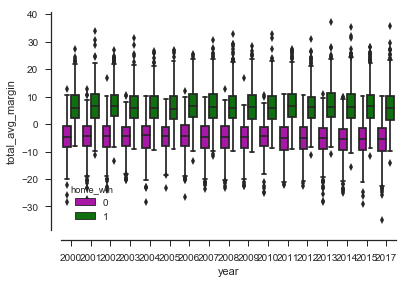

In [53]:
sns.boxplot(x="year", y="total_avg_margin",
            hue="home_win", palette=["m", "g"],
            data=no_ot_clipped)
sns.despine(offset=10, trim=False)

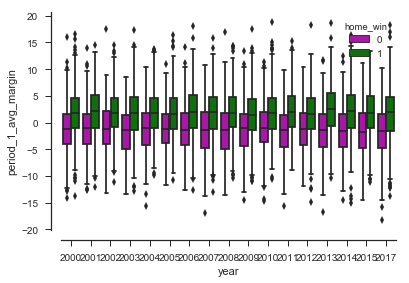

In [54]:
sns.boxplot(x="year", y="period_1_avg_margin",
            hue="home_win", palette=["m", "g"],
            data=no_ot_clipped)
sns.despine(offset=10, trim=False)

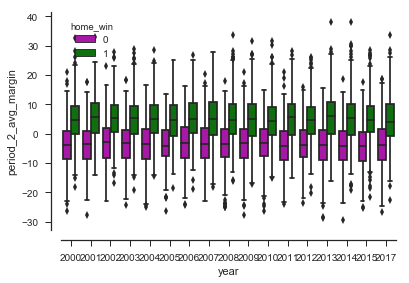

In [55]:
sns.boxplot(x="year", y="period_2_avg_margin",
            hue="home_win", palette=["m", "g"],
            data=no_ot_clipped)
sns.despine(offset=10, trim=False)

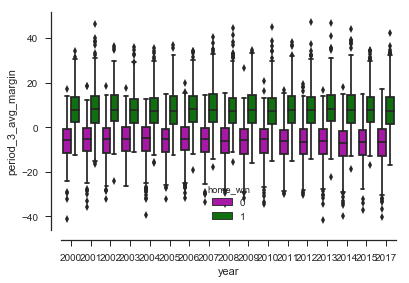

In [56]:
sns.boxplot(x="year", y="period_3_avg_margin",
            hue="home_win", palette=["m", "g"],
            data=no_ot_clipped)
sns.despine(offset=10, trim=False)

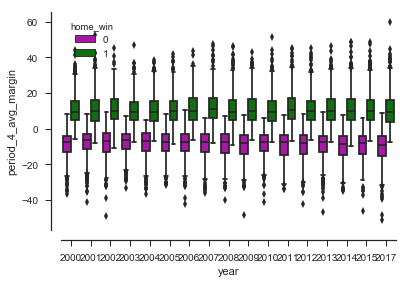

In [57]:
sns.boxplot(x="year", y="period_4_avg_margin",
            hue="home_win", palette=["m", "g"],
            data=no_ot_clipped)
sns.despine(offset=10, trim=False)

### Conclusion 1

Doesn't appear to be much variation over the years. 
As expected, winning teams win and losing teams lose, generally.

What's interesting is that over the course of the game, in most cases, margins widen such that teams generally gain over their opponent, or are gained by their opponent over the course of the game.

And by period 3, we kind of know which team is going to win or lose.

### How often does a period 3 or 4 comeback happen?

In [86]:
win_neg_total_margin = no_ot_df[(no_ot_df['home_win']==1)&(no_ot_df['total_avg_margin']<0)]
win_neg_three_margin = no_ot_df[(no_ot_df['home_win']==1)&(no_ot_df['period_3_avg_margin']<0)]
win_neg_four_margin = no_ot_df[(no_ot_df['home_win']==1)&(no_ot_df['period_4_avg_margin']<0)]

win_neg_total_perc = (str((len(win_neg_total_margin)/TOTAL_RECORDS)*100))
win_neg_three_perc = (str((len(win_neg_three_margin)/TOTAL_RECORDS)*100))
win_neg_four_perc = (str((len(win_neg_four_margin)/TOTAL_RECORDS)*100))

In [87]:
print("# of games home team one even with overall negative margin: {}, percentage of total: {}%".format(len(win_neg_total_margin), win_neg_total_perc))
print("# of games home team one even with third period negative margin: {}, percentage of total: {}%".format(len(win_neg_three_margin), win_neg_three_perc))
print("# of games home team one even with fourth period negative margin: {}, percentage of total: {}%".format(len(win_neg_four_margin), win_neg_four_perc))

# of games home team one even with overall negative margin: 1635, percentage of total: 8.50587868067839%
# of games home team one even with third period negative margin: 2012, percentage of total: 10.46717303090209%
# of games home team one even with fourth period negative margin: 709, percentage of total: 3.6884819477681825%


In [92]:
win_neg_three_max = win_neg_three_margin['period_3_avg_margin'].max()
win_neg_three_min = win_neg_three_margin['period_3_avg_margin'].min()
win_neg_three_mean = win_neg_three_margin['period_3_avg_margin'].mean()

In [95]:
win_neg_four_max = win_neg_four_margin['period_4_avg_margin'].max()
win_neg_four_min = win_neg_four_margin['period_4_avg_margin'].min()
win_neg_four_mean = win_neg_four_margin['period_4_avg_margin'].mean()

In [96]:
print("Period 3 comeback max avg: {}".format(win_neg_three_max))
print("Period 3 comeback min avg: {}".format(win_neg_three_min))
print("Period 3 comeback mean avg: {}".format(win_neg_three_mean))
print("Period 4 comeback max avg: {}".format(win_neg_four_max))
print("Period 4 comeback min avg: {}".format(win_neg_four_min))
print("Period 4 comeback mean avg: {}".format(win_neg_four_mean))

Period 3 comeback max avg: -0.029411764705882353
Period 3 comeback min avg: -24.074074074074073
Period 3 comeback mean avg: -4.159296314602013
Period 4 comeback max avg: -0.02702702702702703
Period 4 comeback min avg: -10.944444444444445
Period 4 comeback mean avg: -2.2071976868442227


### Conclusion 2

So generally speaking, it's not totally uncommon, but not likely for 3rd and 4th period comebacks. If you are less than 5 points behing in the 3rd period, you can win. If you're less than 3 points behing in the fourth period, you can win.

Could dig into this more, but for now this is good enough insight into the nature of NBA comebacks over 10 years of play.